In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [39]:
df = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq="MS"
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

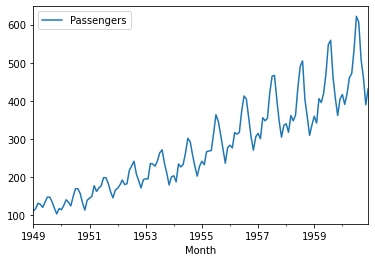

In [40]:
df.plot()

In [41]:
adfuller(df["Passengers"])

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

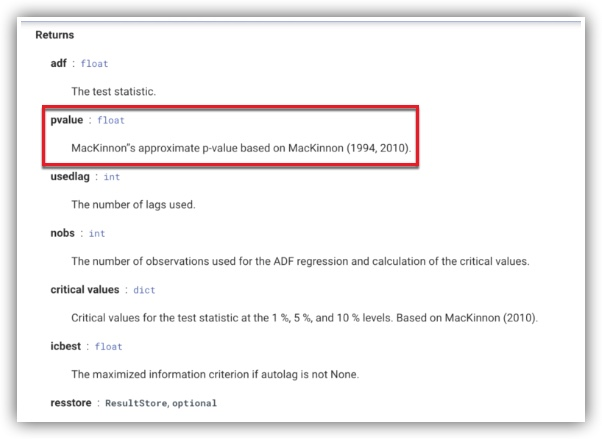

In [42]:
from IPython.display import  Image
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Lazy Programmers/Image/2021-10-24_17-45-00.jpg')

In [43]:
def adf(x):
    res=adfuller(x)
    print("Test Statistics : " ,res[0])
    print("P Value : " ,res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("NoN-Stationary")


In [44]:
adf(df["Passengers"])

Test Statistics :  0.8153688792060512
P Value :  0.991880243437641
NoN-Stationary


In [45]:
adf(np.random.randn(10000))

Test Statistics :  -101.60770515082694
P Value :  0.0
Stationary


In [46]:
adf(np.random.gamma(1,1,1000))

Test Statistics :  -31.37674285008628
P Value :  0.0
Stationary


In [47]:
df["LogPassengers"]=np.log(df["Passengers"])

In [48]:
adf(df["LogPassengers"])

Test Statistics :  -1.717017089106961
P Value :  0.4223667747703911
NoN-Stationary


In [49]:
df["diff"]=df["Passengers"].diff()

<AxesSubplot:xlabel='Month'>

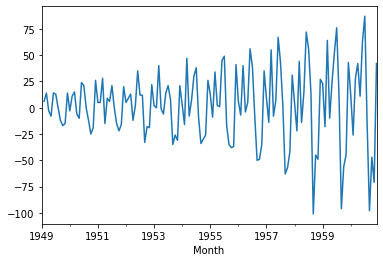

In [50]:
df["diff"].plot()

In [51]:
adf(df["diff"].dropna())

Test Statistics :  -2.8292668241699976
P Value :  0.054213290283825745
NoN-Stationary


In [52]:
df["difflog"]=df["LogPassengers"].diff()

<AxesSubplot:xlabel='Month'>

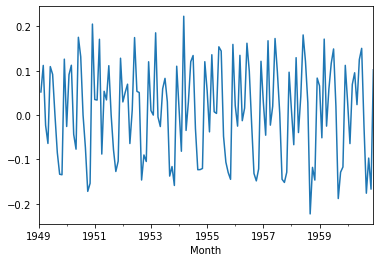

In [53]:
df["difflog"].plot()

In [54]:
adf(df["difflog"].dropna())

Test Statistics :  -2.7171305983881227
P Value :  0.07112054815086045
NoN-Stationary


In [55]:
stocks = pd.read_csv('data/sp500sub.csv',
                 index_col='Date',
                 parse_dates=True)
stocks

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.220000,9.510000,9.170000,9.500000,9.500000,1865400.0,INCY
2010-01-05,9.510000,10.290000,9.450000,10.270000,10.270000,7608900.0,INCY
2010-01-06,10.380000,11.090000,10.350000,11.000000,11.000000,8046700.0,INCY
2010-01-07,11.000000,11.060000,10.620000,10.820000,10.820000,3680300.0,INCY
2010-01-08,10.820000,11.000000,10.750000,10.940000,10.940000,1529300.0,INCY
...,...,...,...,...,...,...,...
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ


In [56]:
goog=stocks[stocks["Name"]=="GOOG"][["Close"]]

In [57]:
goog["LogPrice"]=np.log(goog["Close"])

<AxesSubplot:xlabel='Date'>

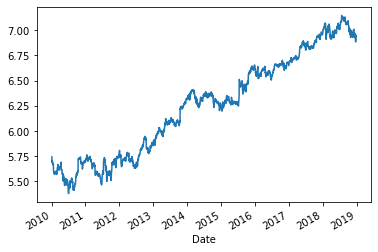

In [58]:
goog["LogPrice"].plot()

In [59]:
adf(goog["LogPrice"].dropna())

Test Statistics :  -0.4181902578906119
P Value :  0.907017067749841
NoN-Stationary


In [60]:
goog["LogRet"]=goog["LogPrice"].diff()

<AxesSubplot:xlabel='Date'>

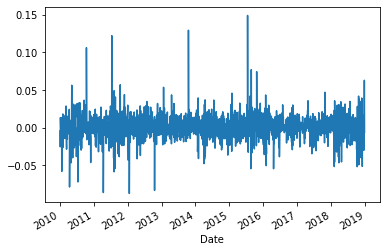

In [61]:
goog["LogRet"].plot()

In [62]:
adf(goog["LogRet"].dropna())

Test Statistics :  -46.66748022773677
P Value :  0.0
Stationary


In [63]:
sbux=stocks[stocks["Name"]=="SBUX"][["Close"]]
sbux["LogPrice"]=np.log(sbux["Close"])

<AxesSubplot:xlabel='Date'>

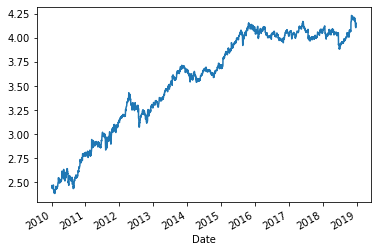

In [64]:
sbux["LogPrice"].plot()

In [65]:
adf(sbux["LogPrice"].dropna())

Test Statistics :  -1.90201335839
P Value :  0.331114556985376
NoN-Stationary


<AxesSubplot:xlabel='Date'>

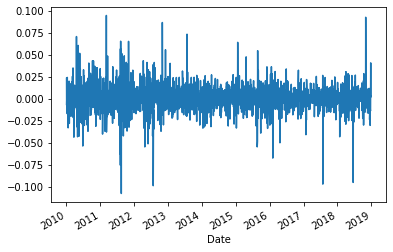

In [66]:
sbux["LogRet"]=sbux["LogPrice"].diff()
sbux["LogRet"].plot()

In [67]:
adf(sbux["LogRet"].dropna())

Test Statistics :  -30.08650142695806
P Value :  0.0
Stationary
